In [10]:
import pandas as pd
import numpy as np
import os
import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
CATEGORIES = ['cats', 'dogs']
EPOCHS = 30
TEST_SET = 0.30


In [11]:
def LoadDataFromDirectory(dataDir : str):
    images = []
    labels = []
    for Category in CATEGORIES:
        singleCategory = os.path.join(dataDir, str(Category))
        
        for image in os.listdir(singleCategory):
            imagsPaths = os.path.join(singleCategory, image)
            
            finalImages = cv2.imread(imagsPaths)
            
            if finalImages is None:
                raise Exception("The directory is null or Empty")
            
            #64 x 64
            img = cv2.resize(finalImages, (64,64))
            images.append(img)
            labels.append(CATEGORIES.index(Category))
    
    return (np.array(images), np.array(labels))
            
        

In [12]:
images, labels = LoadDataFromDirectory("CatsVsDogs/train")

X_train, X_test, Y_train, Y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SET, shuffle=True
)

print(f"X train shape: {X_train.shape}")
print(f"Y train shape: {Y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"Y test shape: {Y_test.shape}")


X train shape: (14000, 64, 64, 3)
Y train shape: (14000,)
X test shape: (6000, 64, 64, 3)
Y test shape: (6000,)


In [13]:
def RestNet50(input_shape = (64,64,3), classes=2, training=False):
    X_input = keras.Input(shape=input_shape)
    
    X = keras.layers.ZeroPadding2D((3,3))(X_input)
    
    #First Block
    Z1 = keras.layers.Conv2D(filters=64, kernel_size=(7,7), strides=2)(X)
    B1 = keras.layers.BatchNormalization(axis=3)(Z1)
    A1 = keras.layers.ReLU()(B1)
    P1 = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid")(A1)
    
    #Second Block
    Z2 = keras.layers.Conv2D(filters=32, kernel_size=(4,4), strides=2)(P1)
    B2 = keras.layers.BatchNormalization(axis=3)(Z2)
    A2 = keras.layers.ReLU()(B2)
    P2 = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding="same")(A2)
    
    X_FLATTEN = keras.layers.Flatten()(P2)
    output = keras.layers.Dense(units=classes, activation="softmax")(X_FLATTEN)
    
    model = keras.Model(X_input, output)
    
    return model
    

In [14]:
ConvModel = RestNet50((64,64,3), 2)
optimizer = keras.optimizers.Adam(learning_rate=1e-5)

# Compilar
ConvModel.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

Y_train_cat = to_categorical(Y_train, num_classes=2)
Y_test_cat  = to_categorical(Y_test, num_classes=2)

history = ConvModel.fit(X_train, Y_train_cat, epochs=EPOCHS, batch_size=32, validation_data=(X_test, Y_test_cat), callbacks=callbacks)
ConvModel.summary()

Epoch 1/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5055 - loss: 0.8653
Epoch 1: val_loss improved from None to 0.70148, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.5400 - loss: 0.7899 - val_accuracy: 0.5975 - val_loss: 0.7015 - learning_rate: 1.0000e-05
Epoch 2/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6034 - loss: 0.6857
Epoch 2: val_loss improved from 0.70148 to 0.66042, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - accuracy: 0.6061 - loss: 0.6848 - val_accuracy: 0.6252 - val_loss: 0.6604 - learning_rate: 1.0000e-05
Epoch 3/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6272 - loss: 0.6575
Epoch 3: val_loss improved from 0.66042 to 0.63520, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - accuracy: 0.6326 - loss: 0.6508 - val_accuracy: 0.6525 - val_loss: 0.6352 - learning_rate: 1.0000e-05
Epoch 4/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6344 - loss: 0.6427
Epoch 4: val_loss improved from 0.63520 to 0.61963, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.6489 - loss: 0.6288 - val_accuracy: 0.6632 - val_loss: 0.6196 - learning_rate: 1.0000e-05
Epoch 5/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6720 - loss: 0.6118
Epoch 5: val_loss improved from 0.61963 to 0.61048, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.6701 - loss: 0.6116 - val_accuracy: 0.6637 - val_loss: 0.6105 - learning_rate: 1.0000e-05
Epoch 6/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6797 - loss: 0.6026
Epoch 6: val_loss improved from 0.61048 to 0.59652, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 29s 65ms/step - accuracy: 0.6804 - loss: 0.5967 - val_accuracy: 0.6768 - val_loss: 0.5965 - learning_rate: 1.0000e-05
Epoch 7/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6976 - loss: 0.5799
Epoch 7: val_loss improved from 0.59652 to 0.59259, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 28s 64ms/step - accuracy: 0.6909 - loss: 0.5842 - val_accuracy: 0.6815 - val_loss: 0.5926 - learning_rate: 1.0000e-05
Epoch 8/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7077 - loss: 0.5731
Epoch 8: val_loss improved from 0.59259 to 0.58138, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.7036 - loss: 0.5732 - val_accuracy: 0.6927 - val_loss: 0.5814 - learning_rate: 1.0000e-05
Epoch 9/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7164 - loss: 0.5581
Epoch 9: val_loss improved from 0.58138 to 0.57685, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - accuracy: 0.7114 - loss: 0.5636 - val_accuracy: 0.6960 - val_loss: 0.5768 - learning_rate: 1.0000e-05
Epoch 10/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7174 - loss: 0.5574
Epoch 10: val_loss improved from 0.57685 to 0.57422, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.7204 - loss: 0.5524 - val_accuracy: 0.6985 - val_loss: 0.5742 - learning_rate: 1.0000e-05
Epoch 11/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7257 - loss: 0.5473
Epoch 11: val_loss did not improve from 0.57422
438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.7239 - loss: 0.5462 - val_accuracy: 0.6868 - val_loss: 0.5777 - learning_rate: 1.0000e-05
Epoch 12/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7333 - loss: 0.5335
Epoch 12: val_loss improved from 0.57422 to 0.55847, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - accuracy: 0.7314 - loss: 0.5361 - val_accuracy: 0.7143 - val_loss: 0.5585 - learning_rate: 1.0000e-05
Epoch 13/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7342 - loss: 0.5308
Epoch 13: val_loss improved from 0.55847 to 0.55366, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.7380 - loss: 0.5284 - val_accuracy: 0.7163 - val_loss: 0.5537 - learning_rate: 1.0000e-05
Epoch 14/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7471 - loss: 0.5209
Epoch 14: val_loss improved from 0.55366 to 0.55000, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - accuracy: 0.7454 - loss: 0.5209 - val_accuracy: 0.7290 - val_loss: 0.5500 - learning_rate: 1.0000e-05
Epoch 15/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7494 - loss: 0.5155
Epoch 15: val_loss improved from 0.55000 to 0.54613, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.7505 - loss: 0.5128 - val_accuracy: 0.7283 - val_loss: 0.5461 - learning_rate: 1.0000e-05
Epoch 16/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7513 - loss: 0.5104
Epoch 16: val_loss did not improve from 0.54613
438/438 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.7530 - loss: 0.5069 - val_accuracy: 0.7278 - val_loss: 0.5492 - learning_rate: 1.0000e-05
Epoch 17/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7639 - loss: 0.4891
Epoch 17: val_loss improved from 0.54613 to 0.53863, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - accuracy: 0.7591 - loss: 0.5003 - val_accuracy: 0.7393 - val_loss: 0.5386 - learning_rate: 1.0000e-05
Epoch 18/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7583 - loss: 0.5011
Epoch 18: val_loss improved from 0.53863 to 0.53623, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - accuracy: 0.7672 - loss: 0.4922 - val_accuracy: 0.7375 - val_loss: 0.5362 - learning_rate: 1.0000e-05
Epoch 19/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7724 - loss: 0.4892
Epoch 19: val_loss improved from 0.53623 to 0.53547, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.7693 - loss: 0.4875 - val_accuracy: 0.7400 - val_loss: 0.5355 - learning_rate: 1.0000e-05
Epoch 20/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7683 - loss: 0.4848
Epoch 20: val_loss improved from 0.53547 to 0.53113, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - accuracy: 0.7719 - loss: 0.4821 - val_accuracy: 0.7425 - val_loss: 0.5311 - learning_rate: 1.0000e-05
Epoch 21/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7777 - loss: 0.4759
Epoch 21: val_loss did not improve from 0.53113
438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.7753 - loss: 0.4759 - val_accuracy: 0.7442 - val_loss: 0.5322 - learning_rate: 1.0000e-05
Epoch 22/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7756 - loss: 0.4744
Epoch 22: val_loss improved from 0.53113 to 0.52698, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - accuracy: 0.7805 - loss: 0.4716 - val_accuracy: 0.7430 - val_loss: 0.5270 - learning_rate: 1.0000e-05
Epoch 23/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7903 - loss: 0.4637
Epoch 23: val_loss improved from 0.52698 to 0.52415, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - accuracy: 0.7840 - loss: 0.4666 - val_accuracy: 0.7458 - val_loss: 0.5242 - learning_rate: 1.0000e-05
Epoch 24/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7862 - loss: 0.4601
Epoch 24: val_loss improved from 0.52415 to 0.52167, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - accuracy: 0.7889 - loss: 0.4597 - val_accuracy: 0.7492 - val_loss: 0.5217 - learning_rate: 1.0000e-05
Epoch 25/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7943 - loss: 0.4513
Epoch 25: val_loss did not improve from 0.52167
438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.7911 - loss: 0.4552 - val_accuracy: 0.7470 - val_loss: 0.5217 - learning_rate: 1.0000e-05
Epoch 26/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7947 - loss: 0.4456
Epoch 26: val_loss improved from 0.52167 to 0.52083, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step - accuracy: 0.7926 - loss: 0.4510 - val_accuracy: 0.7493 - val_loss: 0.5208 - learning_rate: 1.0000e-05
Epoch 27/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7963 - loss: 0.4474
Epoch 27: val_loss improved from 0.52083 to 0.51859, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 31s 70ms/step - accuracy: 0.7966 - loss: 0.4458 - val_accuracy: 0.7490 - val_loss: 0.5186 - learning_rate: 1.0000e-05
Epoch 28/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7965 - loss: 0.4445
Epoch 28: val_loss improved from 0.51859 to 0.51758, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.7974 - loss: 0.4404 - val_accuracy: 0.7500 - val_loss: 0.5176 - learning_rate: 1.0000e-05
Epoch 29/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8015 - loss: 0.4364
Epoch 29: val_loss did not improve from 0.51758
438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - accuracy: 0.8024 - loss: 0.4369 - val_accuracy: 0.7443 - val_loss: 0.5230 - learning_rate: 1.0000e-05
Epoch 30/30
437/438 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8070 - loss: 0.4357
Epoch 30: val_loss improved from 0.51758 to 0.51567, saving model to best_model.h5


438/438 ━━━━━━━━━━━━━━━━━━━━ 32s 72ms/step - accuracy: 0.8056 - loss: 0.4337 - val_accuracy: 0.7505 - val_loss: 0.5157 - learning_rate: 1.0000e-05
Restoring model weights from the end of the best epoch: 30.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 70, 70, 3)      │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 32)       │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           578 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,320 (505.16 KB)

 Trainable params: 43,042 (168.13 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 86,086 (336.28 KB)

/var/folders/64/_d7wbs111535lmdv26qfwp000000gn/T/ipykernel_5681/974158325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/var/folders/64/_d7wbs111535lmdv26qfwp000000gn/T/ipykernel_5681/974158325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

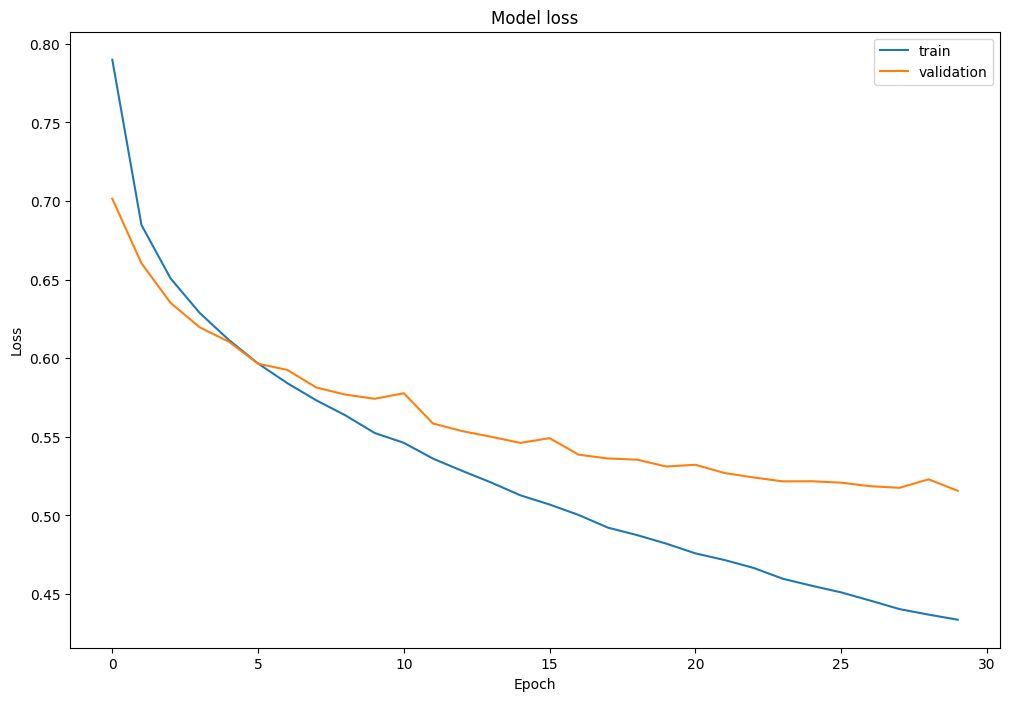

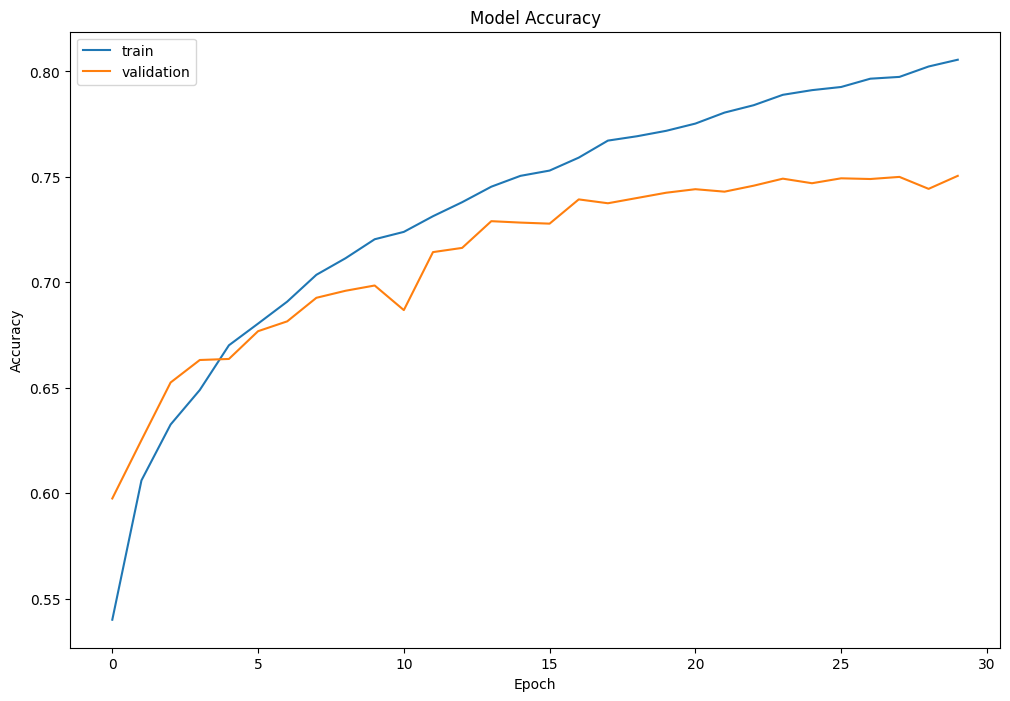

In [15]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')